In [1]:
import pandas as pd 
df=pd.read_csv('d:/data/project/project_income.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wave                92857 non-null  int64  
 1   region              92857 non-null  int64  
 2   family_member       92857 non-null  int64  
 3   year_born           92857 non-null  int64  
 4   education_level     92857 non-null  int64  
 5   marriage            92857 non-null  int64  
 6   religion            92857 non-null  int64  
 7   occupation          59215 non-null  float64
 8   company_size        59215 non-null  float64
 9   reason_none_worker  32147 non-null  float64
 10  gender              92857 non-null  int64  
 11  label               92857 non-null  int64  
 12  income              92857 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 9.2 MB


In [2]:
df = df.fillna(0)

In [3]:
check_for_nan = df.isnull().sum().sum()
print('NAN개수:'+str(check_for_nan))#NAN 개수확인

NAN개수:0


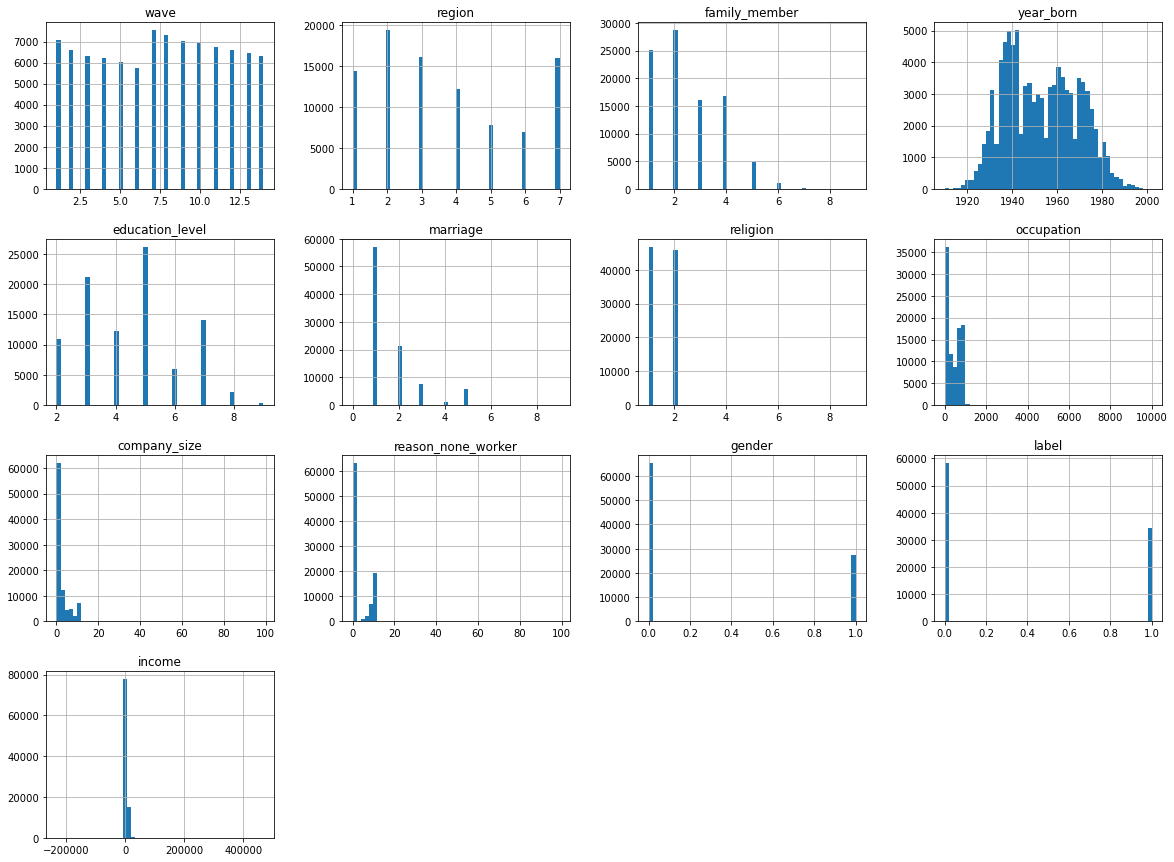

In [4]:
import matplotlib.pyplot as plt 
df.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
train_cols=df.columns[:-2]
X=df[train_cols]
y=df['label']
y.value_counts()

0    58337
1    34520
Name: label, dtype: int64

In [6]:
from imblearn.under_sampling import RandomUnderSampler 
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [7]:
df_samp.label.value_counts()

0    34520
1    34520
Name: label, dtype: int64

In [8]:
X=df_samp[train_cols]
y=df_samp['label']

In [9]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [10]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(random_state=10, max_iter=1000)
logit.fit(X_train,y_train)
print(logit.score(X_train,y_train))
print(logit.score(X_test,y_test))

0.8294829084588644
0.828215527230591


<AxesSubplot:>

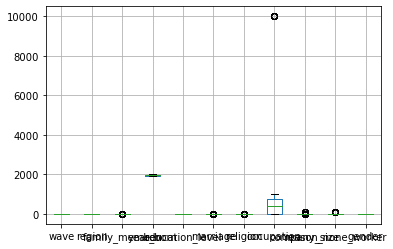

In [11]:
X_train.boxplot()

In [12]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train))
X_test_scaled=pd.DataFrame(scaler.transform(X_test))

<AxesSubplot:>

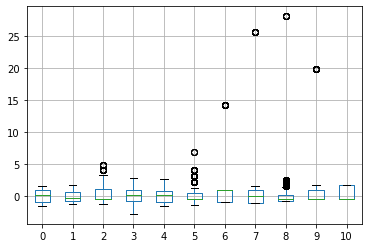

In [13]:
X_train_scaled.boxplot()

In [14]:
result_tr=[]
result_te=[]

In [15]:
logit=LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)

LogisticRegression(random_state=10)

In [16]:
score_tr=logit.score(X_train_scaled, y_train)
score_te=logit.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.832361674391657
0.8331402085747392


In [17]:
from sklearn.tree import DecisionTreeClassifier 
tree=DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=10)

In [18]:
print(tree.score(X_train_scaled, y_train))
print(tree.score(X_test_scaled, y_test))

0.9974290266512167
0.8243047508690614


In [19]:
tree=DecisionTreeClassifier(random_state=10,max_depth=9)
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [20]:
score_tr=tree.score(X_train_scaled, y_train)
score_te=tree.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.8080641657010429
0.8017815758980301


In [21]:
# from sklearn.tree import export_graphviz
# import pydotplus 
# import graphviz
# from IPython.display import Image
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz 2.44.1\bin'

# dot_data = export_graphviz(tree, out_file=None,feature_names=train_cols, class_names=["0","1"],filled=True, rounded=True, special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

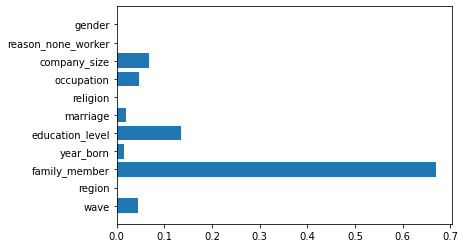

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
def plot_tree(model):
    n_features=X.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),train_cols)
    plt.ylim(-1,n_features)
plot_tree(tree)    

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [24]:
score_tr=forest.score(X_train_scaled, y_train)
score_te=forest.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.9974290266512167
0.8736964078794901


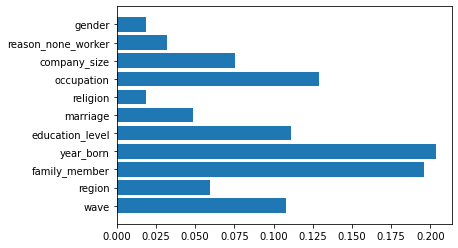

In [25]:
plot_tree(forest)

최적의 k: 7
최고 정확도: 0.8543597914252608


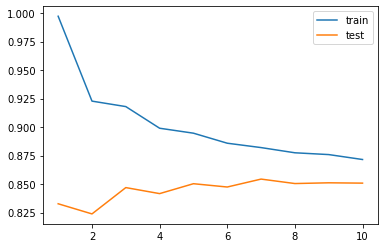

In [26]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate=[]
test_rate=[]
neighbors=range(1,11)
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    train_rate.append(knn.score(X_train_scaled, y_train))
    test_rate.append(knn.score(X_test_scaled, y_test))
test_arr=np.array(test_rate)    
max_rate=np.max(test_arr)
idx=np.where(test_arr == max_rate)[0][0]
print('최적의 k:',neighbors[idx])
print('최고 정확도:', test_rate[idx])
plt.plot(neighbors, train_rate, label='train')
plt.plot(neighbors, test_rate, label='test')
plt.legend()
plt.show()

In [27]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
score_tr=knn.score(X_train_scaled, y_train)
score_te=knn.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

0.8820068076477404
0.8543597914252608


In [29]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=10)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(random_state=10)

In [30]:
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.8611855446118193
0.8539976825028969


ValueError: x and y must have same first dimension, but have shapes (0,) and (10,)

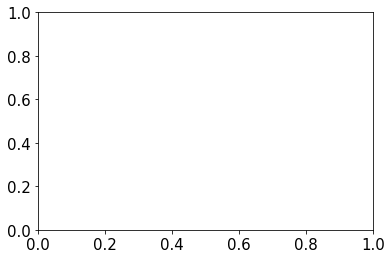

In [31]:
plt.rcParams['font.size'] = 15
plt.plot(range(10,0),train_rate,label = 'Train')
plt.plot(range(10,0),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

max_rate = max(test_rate)
idx = np.where(test_rate == max_rate)[0][0]
print('idx: ',idx)
print('최적의 정확도:',max_rate)
cnt = 0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
            break
        cnt+=1

In [ ]:
mlp=MLPClassifier(random_state=10,max_iter=1000,hidden_layer_sizes=[100,100])
mlp.fit(X_train_scaled, y_train)

In [ ]:
score_tr=mlp.score(X_train_scaled, y_train)
score_te=mlp.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

In [ ]:
from sklearn.svm import SVC 
svm=SVC(random_state=10)
svm.fit(X_train_scaled, y_train)
print(svm.score(X_train_scaled, y_train))
print(svm.score(X_test_scaled, y_test))

In [ ]:
import numpy as np 
train_rate=[]
test_rate=[]
c_values=[0.1, 1, 10, 100 ]
g_values=[0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        svm=SVC(C=n, gamma=g, random_state=10)
        svm.fit(X_train_scaled, y_train)
        train_rate.append([n,g,svm.score(X_train_scaled, y_train)])
        test_rate.append([n,g,svm.score(X_test_scaled, y_test)])

In [ ]:
train_arr=np.array(train_rate)
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2])
idx=np.argmax(test_arr[:,2])
print('최적의 c:', test_rate[idx][0])
print('최적의 gamma:', test_rate[idx][1])
print('최고 정확도:', test_rate[idx][2])
plt.rcParams['font.size']=15
plt.plot(range(len(train_rate)),train_arr[:,2],label='train')
plt.plot(range(len(test_rate)),test_arr[:,2],label='test')
plt.legend()
plt.show()

In [ ]:
svm=SVC(C=100, gamma=0.1, random_state=10)
svm.fit(X_train_scaled, y_train)

In [ ]:
score_tr=svm.score(X_train_scaled, y_train)
score_te=svm.score(X_test_scaled, y_test)
print(score_tr)
print(score_te)
result_tr.append(score_tr)
result_te.append(score_te)

In [ ]:
methods=['LOGIT','TREE','RF','KNN','ANN','SVM']
result_tr_arr=np.array(result_tr)
max_rate_tr=np.max(result_tr_arr)
idx_tr=np.argmax(result_tr_arr)

result_te_arr=np.array(result_te)
max_rate_te=np.max(result_te_arr)
idx_te=np.argmax(result_te_arr)

print('최적의 모형:', methods[idx_te])
print('최고 정확도:', max_rate_te)
plt.rcParams['font.size']=15
plt.plot(methods, result_tr_arr, label='train')
plt.plot(methods, result_te_arr, label='test')
plt.legend()
plt.show()
print(methods)
print(result_te)

In [ ]:
import statsmodels.api as sm 
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())